# Heart Brain Dataset

# Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Reading the Dataset

In [40]:
df = pd.read_csv('heartbrain.csv')
print(df.shape)
df.head(10)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [41]:
df.dtypes

Gender                 int64
Age Range              int64
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

In [42]:
print(df['Gender'].unique())
print(df['Age Range'].unique())

[1 2]
[1 2]


# Checking for Null Values

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64


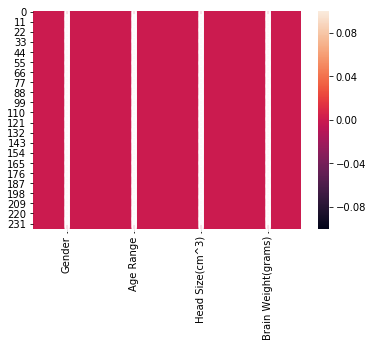

In [43]:
# Checking For null values
print(df.isnull().sum())
sns.heatmap(df.isnull(),annot=True)

No Null Values are present

# Lets Check for Outliers:

In [44]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [46]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print(df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(237, 4)
(236, 4)


# Exploratory Data Analysis:
    
    1.Univariate Analysis.
    
    2.Bivariate Analysis.
    
    3.Multivariate Analysis

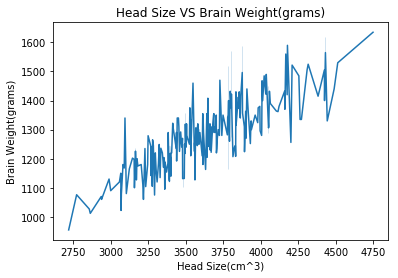

In [47]:
# Impact of Head Size on Brain weight
sns.lineplot(x=df['Head Size(cm^3)'],y=df['Brain Weight(grams)'],data=df)
plt.title('Head Size VS Brain Weight(grams)')
plt.show()

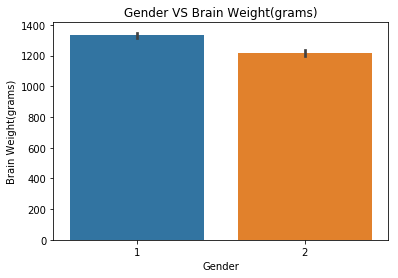

In [48]:
# Bivariate Analysis:
sns.barplot(x=df['Gender'],y=df['Brain Weight(grams)'],data=df)
plt.title('Gender VS Brain Weight(grams)')
plt.show()

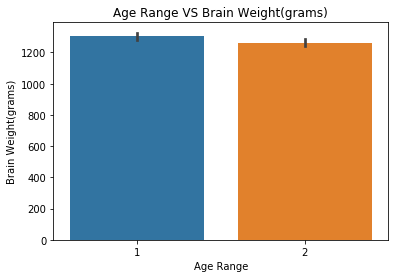

In [49]:
# Bivariate Analysis
sns.barplot(x=df['Age Range'],y=df['Brain Weight(grams)'],data=df)
plt.title('Age Range VS Brain Weight(grams)')
plt.show()

# Lets check the skewness

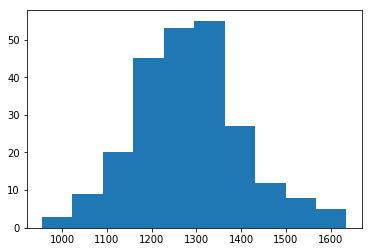

In [50]:
#Lets draw the histogram
plt.hist(x='Brain Weight(grams)',bins=10,data=df)
plt.show()

In [51]:
df.skew()

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

# Lets check the input and output variable:

In [52]:
x = df[['Head Size(cm^3)']]
y = df[['Brain Weight(grams)']]

In [53]:
print(x.shape)
print(y.shape)

(237, 1)
(237, 1)


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [55]:
# Training and Testing Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
def classify(regr,X,y):
    max_r_score = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max_r_score corresponding to:",final_r_state,"is",max_r_score)
    return final_r_state

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
r_state = classify(lr,X,y)

r2_score corresponding to random state:  42 is  0.7149168473012075
r2_score corresponding to random state:  43 is  0.6404165530671617
r2_score corresponding to random state:  44 is  0.653010968876236
r2_score corresponding to random state:  45 is  0.6939862623941999
r2_score corresponding to random state:  46 is  0.5332650244375814
r2_score corresponding to random state:  47 is  0.6201411206780885
r2_score corresponding to random state:  48 is  0.6851449361873334
r2_score corresponding to random state:  49 is  0.6433491336855989
r2_score corresponding to random state:  50 is  0.7683161771318532
r2_score corresponding to random state:  51 is  0.5935686929145347
r2_score corresponding to random state:  52 is  0.6342022687682457
r2_score corresponding to random state:  53 is  0.5909146568147448
r2_score corresponding to random state:  54 is  0.6130331905389369
r2_score corresponding to random state:  55 is  0.5884150240645216
r2_score corresponding to random state:  56 is  0.7399588791116

In [58]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.4936984443261272
standard deviation in r2_score for linear Regression: 0.1277355091299327


 Lets try Lasso Regression:

In [59]:
from sklearn.linear_model import Lasso
lass = Lasso()
r_state = classify(lass,X,y)

r2_score corresponding to random state:  42 is  0.7144889028944099
r2_score corresponding to random state:  43 is  0.6405455346310935
r2_score corresponding to random state:  44 is  0.651482141082713
r2_score corresponding to random state:  45 is  0.6940205832211771
r2_score corresponding to random state:  46 is  0.5336407722657618
r2_score corresponding to random state:  47 is  0.6188792123794971
r2_score corresponding to random state:  48 is  0.6838742866394709
r2_score corresponding to random state:  49 is  0.6435499930934203
r2_score corresponding to random state:  50 is  0.7668230053462677
r2_score corresponding to random state:  51 is  0.5930570273807617
r2_score corresponding to random state:  52 is  0.6346688104602674
r2_score corresponding to random state:  53 is  0.5902751900468339
r2_score corresponding to random state:  54 is  0.6125810082675966
r2_score corresponding to random state:  55 is  0.5896442015959302
r2_score corresponding to random state:  56 is  0.7366479562977

In [60]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lass,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lass,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.49265461538671307
standard deviation in r2_score for lasso Regression: 0.1270573589801607


Lets try Ridge Regression:

In [61]:
from sklearn.linear_model import Ridge
ridge=Ridge()
r_state = classify(lass,X,y)

r2_score corresponding to random state:  42 is  0.7144889028944099
r2_score corresponding to random state:  43 is  0.6405455346310935
r2_score corresponding to random state:  44 is  0.651482141082713
r2_score corresponding to random state:  45 is  0.6940205832211771
r2_score corresponding to random state:  46 is  0.5336407722657618
r2_score corresponding to random state:  47 is  0.6188792123794971
r2_score corresponding to random state:  48 is  0.6838742866394709
r2_score corresponding to random state:  49 is  0.6435499930934203
r2_score corresponding to random state:  50 is  0.7668230053462677
r2_score corresponding to random state:  51 is  0.5930570273807617
r2_score corresponding to random state:  52 is  0.6346688104602674
r2_score corresponding to random state:  53 is  0.5902751900468339
r2_score corresponding to random state:  54 is  0.6125810082675966
r2_score corresponding to random state:  55 is  0.5896442015959302
r2_score corresponding to random state:  56 is  0.7366479562977

In [62]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").std())

mean r2_score for Ridge Regression: 0.4932485260336307
standard deviation in r2_score for Ridge Regression: 0.12741596009132036


Lets try Hyperparametre tuning on Laaso Regression to improve Accuracy.

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [64]:
# Lets try Hyperparametre Tuning:
param = {'alpha':[0.001,0.01,0.1,1]}

In [65]:
from sklearn.model_selection import GridSearchCV
grid_score = GridSearchCV(lasso,param_grid=param,scoring='neg_mean_squared_error',cv=5)

In [66]:
grid_score.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [67]:
grid_score.best_params_

{'alpha': 0.001}

In [68]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

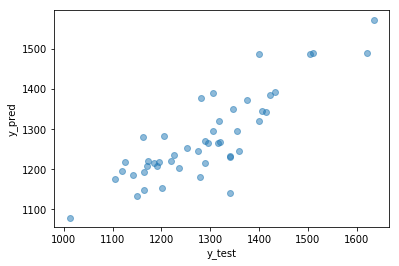

In [69]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 54.62619697570591
MSE: 4672.049164242275
RMSE: 68.35238960155142


In [71]:
metrics.r2_score(y_test, y_pred)

0.7149165047043459

Max score we can obtain is 71 % in Hyperparametre tuning is Lasso Regression and we are going to consider Linear Regression

# Saving Best Model

In [72]:
import joblib
joblib.dump(lr,'lr.obj')
lr_from_joblib = joblib.load('lr.obj')
lr_from_joblib.predict(X_test)

array([[1249.86135176],
       [1349.53180634],
       [1271.27595871],
       [1221.30854249],
       [1325.47342075],
       [1156.27158804],
       [1377.55585988],
       [1081.98140836],
       [1268.89655794],
       [1218.66476385],
       [1383.63655075],
       [1197.77891263],
       [1326.00217648],
       [1299.56439012],
       [1274.9772488 ],
       [1239.02185935],
       [1579.80492555],
       [1300.88627944],
       [1199.62955767],
       [1494.4108756 ],
       [1224.21669899],
       [1223.4235654 ],
       [1258.05706553],
       [1179.53684004],
       [1235.0561914 ],
       [1188.79006526],
       [1268.89655794],
       [1495.99714278],
       [1222.10167608],
       [1494.14649774],
       [1395.79793247],
       [1287.66738625],
       [1210.99780581],
       [1143.05269486],
       [1495.99714278],
       [1346.8880277 ],
       [1237.1712143 ],
       [1135.65011468],
       [1219.19351958],
       [1397.38419965],
       [1183.76688585],
       [1391.303